## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [3]:
# Descreve em texto o teu modelo

# Leitura/carregamento da informação do ficheiro
def lerDataset(fnome):
    bd=[]
    f=open(fnome, encoding="utf-8")
    f.readline()
    for linha in f:
        novaLinha=linha.replace("\n","")
        campos=novaLinha.split(",")
        aluno={}
        aluno["id"]=campos[0]
        aluno["nome"]=campos[1]
        aluno["curso"]=campos[2]
        listaTPC=[]
        for tpc in campos[3:]:
            listaTPC.append(int(tpc))
        aluno["tpc"]=listaTPC
        bd.append(aluno)
    return bd

BD=lerDataset("alunos.csv")

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [3]:
# Listagem da informação
def listarDataset(bd):
    print("id      |nome                     |curso           |média")
    print("----------------------------------------------------------")
    for a in bd:
        media=sum(a["tpc"])/len(a["tpc"])
        print(a["id"]+"|"+a["nome"]+"|"+a["curso"]+"|"+str(media))
        
listarDataset(BD)

id      |nome                     |curso           |média
----------------------------------------------------------
"a1"|"Aysha Melanie Gilberto"|"LEI"|11.75
"a2"|"Igor André Cantanhede"|"ENGFIS"|16.5
"a3"|"Laurénio Narciso"|"ENGFIS"|12.75
"a4"|"Jasnoor Casegas"|"LCC"|15.5
"a5"|"Tawseef Rebouças"|"ENGBIOM"|14.25
"a6"|"Eryk Clementino"|"LEI"|13.5
"a7"|"Ianna Noivo"|"ENGBIOM"|15.75
"a8"|"Ayla Thaissa Reina"|"ENGBIOM"|11.5
"a9"|"Cássia Viviane Coitã"|"ENGFIS"|13.0
"a10"|"Koby Vindima"|"LEI"|14.0
"a11"|"Gustavo Martim Hernandez"|"ENGBIOM"|11.0
"a12"|"Siddarta Beiriz"|"LEI"|14.75
"a13"|"Daniela Patrícia Montes"|"ENGBIOM"|16.75
"a14"|"Kaylla Pessego"|"LCC"|14.0
"a15"|"Bianca Cristina Primitivo"|"ENGBIOM"|13.25
"a16"|"Magna Galhardo"|"ENGFIS"|15.25
"a17"|"Grace Isabel Patriarca"|"LCC"|12.75
"a18"|"Saubhagya Buco"|"LEI"|15.25
"a19"|"Ivo Vicente Boisa"|"ENGBIOM"|13.75
"a20"|"Vivaan Castilhos"|"ENGFIS"|13.0
"a21"|"Layana Camejo"|"ENGFIS"|14.75
"a22"|"Mahdi Menoita"|"ENGFIS"|12.75
"a23"|"Yifan C

## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [7]:
def distribPorCurso(bd):
    distribuicao = {}
    for a in bd:
        if a["curso"] in distribuicao.keys():
            distribuicao[a["curso"]]=distribuicao[a["curso"]]+1
        else:
            distribuicao[a["curso"]]=1
    return distribuicao
print(distribPorCurso(BD))

{'"LEI"': 23, '"ENGFIS"': 32, '"LCC"': 20, '"ENGBIOM"': 25}


## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [5]:
def distribPorMedia(bd):
    distribuicao = {}
    for a in bd:
        media=sum(a["tpc"])/len(a["tpc"])
        if media%1<0.5:
            media=str(int(media))
        else:
            media=str(int(media)+1)
        if media in distribuicao.keys():
            distribuicao[media]=distribuicao[media]+1
        else:
            distribuicao[media]=1
    return distribuicao
print("Média Inteira: Nº de alunos")
print(distribPorMedia(BD))

Média Inteira: Nº de alunos
{'12': 11, '17': 9, '13': 20, '16': 9, '14': 20, '11': 5, '15': 20, '18': 4, '10': 2}


# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

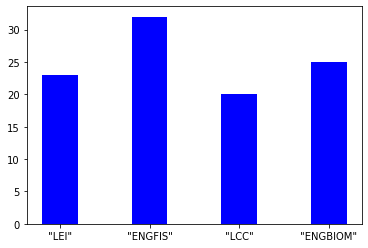

In [8]:
def plotDistribPorCurso(bd):
    import matplotlib.pyplot as plt
    basedados=distribPorCurso(bd)
    left = [] 
    height = []
    tick_label=[]
    i=1
    for curso in basedados:
        left.append(i)
        i=i+2
        height.append(basedados[curso])
        tick_label.append(curso)
   
    plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue'])
plotDistribPorCurso(BD)

## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

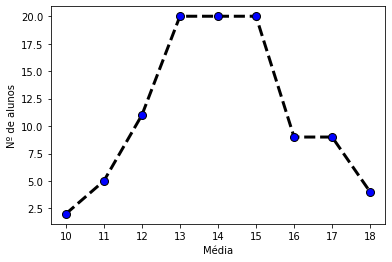

In [9]:
def plotDistribPorMedia(bd):
    import matplotlib.pyplot as plt
    basedados=distribPorMedia(bd)
    listamedias = [] 
    numalunos = []
    for media in basedados:
        listamedias.append(media)
    x=sorted(listamedias)
    for medias in x:
        numalunos.append(basedados[medias])
    plt.plot(x, numalunos,color="black",linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('Média')
    plt.ylabel("Nº de alunos")
    plt.show()
plotDistribPorMedia(BD)